In [6]:
import numpy as np 
import cv2
import matplotlib
from matplotlib import pyplot as plt 
%matplotlib inline

In [7]:
img = cv2.imread('./images/rdj/rdj_199.jpg')
img.shape

(264, 191, 3)

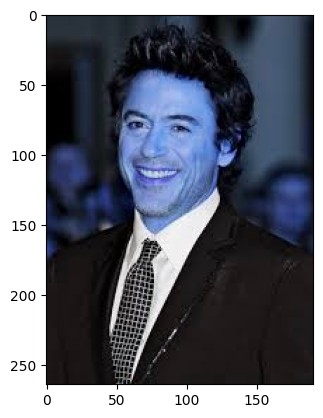

In [8]:
plt.imshow(img)

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(264, 191)

In [10]:
gray

array([[52, 52, 52, ..., 36, 34, 33],
       [52, 52, 52, ..., 35, 33, 31],
       [52, 52, 52, ..., 33, 30, 29],
       ...,
       [23, 23, 23, ..., 25, 25, 24],
       [23, 23, 23, ..., 24, 24, 24],
       [23, 23, 23, ..., 24, 24, 23]], dtype=uint8)

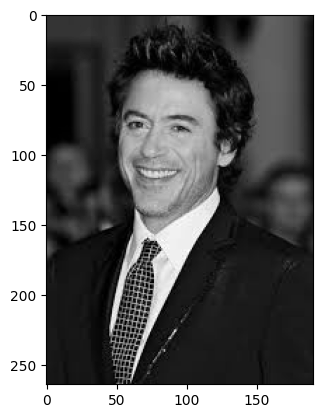

In [11]:
plt.imshow(gray, cmap='gray')

In [12]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade  = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[41, 47, 84, 84]], dtype=int32)

In [17]:
(x,y,w,h) = faces[0]
print(x,y,w,h)

41 47 84 84


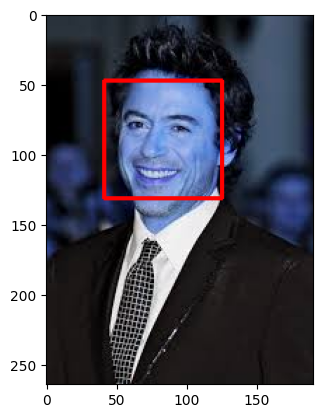

In [14]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

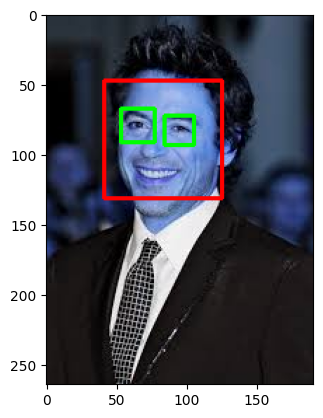

In [15]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

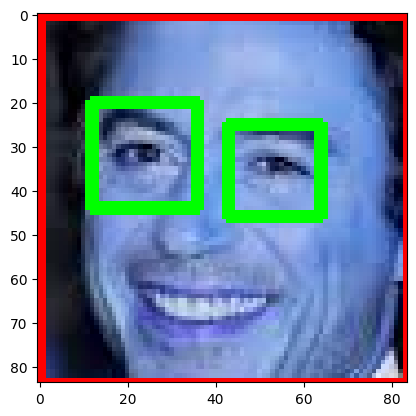

In [16]:
plt.imshow(roi_color,cmap='gray')

In [18]:
def face_detection(path):

    img  = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray  = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)

        if len(eyes) >= 1:
            return roi_color

    return None

In [19]:
cropped_img = face_detection('./images/rdj/rdj_199.jpg')

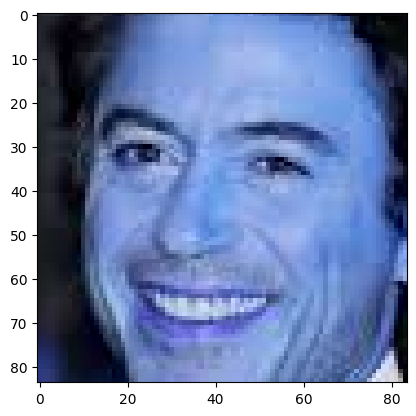

In [20]:
plt.imshow(cropped_img)

Face unrecognisable in  ./images/rdj/rdj_1292.jpg
Face unrecognisable in  ./images/rdj/rdj_1125.jpg
Face unrecognisable in  ./images/rdj/rdj_1301.jpg
Face unrecognisable in  ./images/rdj/rdj_495.jpg
Face unrecognisable in  ./images/rdj/rdj_1083.jpg
Face unrecognisable in  ./images/rdj/rdj_1173.jpg
Face unrecognisable in  ./images/rdj/rdj_483.jpg
Face unrecognisable in  ./images/rdj/rdj_584.jpg
Face unrecognisable in  ./images/rdj/rdj_463.jpg
Face unrecognisable in  ./images/rdj/rdj_815.jpg
Face unrecognisable in  ./images/rdj/rdj_631.jpg
Face unrecognisable in  ./images/rdj/rdj_1209.jpg
Face unrecognisable in  ./images/rdj/rdj_953.jpg
Face unrecognisable in  ./images/rdj/rdj_588.jpg
Face unrecognisable in  ./images/rdj/rdj_421.jpg
Face unrecognisable in  ./images/rdj/rdj_567.jpg
Face unrecognisable in  ./images/rdj/rdj_838.jpg
Face unrecognisable in  ./images/rdj/rdj_299.jpg
Face unrecognisable in  ./images/rdj/rdj_1006.jpg
Face unrecognisable in  ./images/rdj/rdj_434.jpg
Face unrecogn

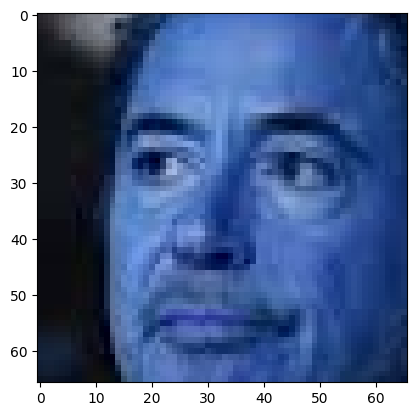

In [21]:
import os
path = './images/rdj/'
for files in os.listdir(path):
    filename = os.path.join(path, files)
    img = face_detection(filename)

    if img is not None:
        plt.imshow(img)
    else:
        print("Face unrecognisable in ",filename)